In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets, svm,tree,metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [37]:
data = pd.read_csv('outfile_act.txt')
data.head(-10)

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg),activity
0,0.000000,3.428497,9.112331,-2.047042,9.948847,101.873802,69.381287,dribble
1,0.009703,3.447650,9.285912,-2.331953,10.176072,103.247643,69.631172,dribble
2,0.019734,3.506308,9.212888,-2.244564,10.109875,102.827530,69.163811,dribble
3,0.029704,3.703830,8.972271,-1.990779,9.908744,101.590256,67.568748,dribble
4,0.039805,3.902549,8.799889,-1.545457,9.749685,99.120628,66.083809,dribble
...,...,...,...,...,...,...,...,...
52898,3.249609,0.396227,0.922536,0.234783,1.031112,76.838371,66.756607,shoot
52899,3.259734,0.392566,0.918143,0.229780,1.024643,77.041016,66.850136,shoot
52900,3.269758,0.386953,0.913262,0.227217,1.017550,77.097160,67.037437,shoot
52901,3.279838,0.382072,0.909235,0.222824,1.011107,77.268852,67.207268,shoot


In [38]:
data.isnull().sum()

Time (s)        0
 X (m/s2)       0
 Y (m/s2)       0
 Z (m/s2)       0
 R (m/s2)       0
 Theta (deg)    0
 Phi (deg)      0
 activity       0
dtype: int64

In [39]:
ss = StandardScaler()
data.iloc[:, 0:1] = ss.fit_transform(data.iloc[:, 0:1])

In [40]:
scaler = MinMaxScaler(feature_range=(0, 1))
data.iloc[:, 0:7] = scaler.fit_transform(data.iloc[:, 0:7])
data.head(-10)

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg),activity
0,0.000000,0.548316,0.450073,0.508476,0.182028,0.573153,0.192743,dribble
1,0.000469,0.548562,0.453244,0.503870,0.186216,0.581709,0.193437,dribble
2,0.000955,0.549317,0.451910,0.505283,0.184996,0.579092,0.192138,dribble
3,0.001437,0.551858,0.447515,0.509386,0.181289,0.571387,0.187707,dribble
4,0.001926,0.554414,0.444367,0.516585,0.178356,0.556008,0.183581,dribble
...,...,...,...,...,...,...,...,...
52898,0.157209,0.509309,0.300493,0.545364,0.017636,0.417245,0.185451,shoot
52899,0.157699,0.509262,0.300413,0.545283,0.017517,0.418507,0.185710,shoot
52900,0.158184,0.509190,0.300323,0.545241,0.017386,0.418857,0.186231,shoot
52901,0.158672,0.509127,0.300250,0.545170,0.017267,0.419926,0.186703,shoot


In [41]:
norm = Normalizer()
data.iloc[:, 0:7] = norm.fit_transform(data.iloc[:, 0:7])
data.head(-10)

,Time (s),X (m/s2),Y (m/s2),Z (m/s2),R (m/s2),Theta (deg),Phi (deg),activity
0,0.000000,0.508977,0.417783,0.471996,0.168968,0.532033,0.178914,dribble
1,0.000434,0.506991,0.418896,0.465686,0.172105,0.537626,0.178778,dribble
2,0.000883,0.508328,0.418189,0.467580,0.171192,0.535882,0.177801,dribble
3,0.001335,0.512636,0.415709,0.473182,0.168404,0.530777,0.174366,dribble
4,0.001799,0.517815,0.415032,0.482482,0.166582,0.519303,0.171462,dribble
...,...,...,...,...,...,...,...,...
52898,0.167526,0.542733,0.320213,0.581154,0.018793,0.444627,0.197621,shoot
52899,0.167942,0.542339,0.319925,0.580699,0.018655,0.445689,0.197772,shoot
52900,0.168414,0.542119,0.319746,0.580503,0.018510,0.445945,0.198275,shoot
52901,0.168834,0.541734,0.319480,0.580086,0.018373,0.446820,0.198660,shoot


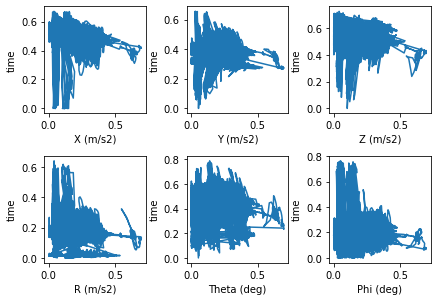

In [42]:
x = data['Time (s)']
y = data[' X (m/s2)']

plt.subplot(2, 3, 1)
plt.ylabel("time")
plt.xlabel("X (m/s2)")
plt.plot(x,y)

#plot 2:
x = data['Time (s)']
y = data[' Y (m/s2)']

plt.subplot(2, 3, 2)
plt.ylabel("time")
plt.xlabel("Y (m/s2)")
plt.plot(x,y)

x = data['Time (s)']
y = data[' Z (m/s2)']

plt.subplot(2, 3, 3)
plt.ylabel("time")
plt.xlabel("Z (m/s2)")
plt.plot(x,y)

x = data['Time (s)']
y = data[' R (m/s2)']

plt.subplot(2, 3, 4)
plt.ylabel("time")
plt.xlabel("R (m/s2)")
plt.plot(x,y)

x = data['Time (s)']
y = data[' Theta (deg)']

plt.subplot(2, 3, 5)
plt.ylabel("time")
plt.xlabel("Theta (deg)")
plt.plot(x,y)

x = data['Time (s)']
y = data[' Phi (deg)']

plt.subplot(2, 3, 6)
plt.ylabel("time")
plt.xlabel("Phi (deg)")
plt.plot(x,y)

plt.subplots_adjust(left=0.005,
                    bottom=0.01, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

array([[<AxesSubplot:title={'center':'Time (s)'}>,
        <AxesSubplot:title={'center':' X (m/s2)'}>,
        <AxesSubplot:title={'center':' Y (m/s2)'}>],
       [<AxesSubplot:title={'center':' Z (m/s2)'}>,
        <AxesSubplot:title={'center':' R (m/s2)'}>,
        <AxesSubplot:title={'center':' Theta (deg)'}>],
       [<AxesSubplot:title={'center':' Phi (deg)'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

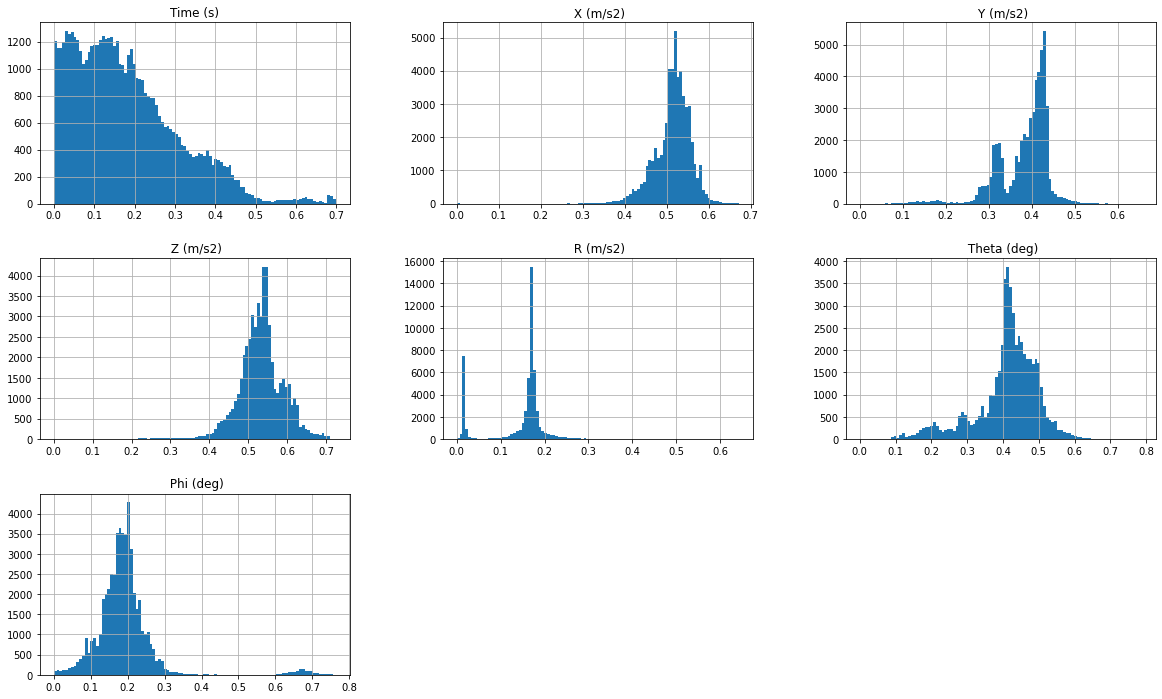

In [43]:
data.hist(bins=100, figsize=(20, 12))

In [44]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 7].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
kn_clf = KNeighborsClassifier(n_neighbors=4, metric='minkowski')
kn_clf = kn_clf.fit(X_train, y_train)
y_pred = kn_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))
acc2 = kn_clf.score(X_train, y_train)
acc2




              precision    recall  f1-score   support

     dribble       0.91      0.90      0.90      3871
        hold       0.91      0.98      0.94      1891
        pass       0.91      0.93      0.92      3467
      pickup       0.94      0.96      0.95      4563
       shoot       0.95      0.86      0.90      2082

    accuracy                           0.93     15874
   macro avg       0.93      0.92      0.92     15874
weighted avg       0.93      0.93      0.93     15874



0.9553713653176381

In [47]:
rf_clf = RandomForestClassifier(max_depth=17, random_state=5)
rf_clf = rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
acc2 = rf_clf.score(X_train, y_train)
acc2

              precision    recall  f1-score   support

     dribble       0.93      0.89      0.91      3871
        hold       0.94      0.97      0.95      1891
        pass       0.91      0.93      0.92      3467
      pickup       0.94      0.95      0.94      4563
       shoot       0.93      0.89      0.91      2082

    accuracy                           0.93     15874
   macro avg       0.93      0.93      0.93     15874
weighted avg       0.93      0.93      0.93     15874



0.9876886525014175

In [48]:
clf = svm.SVC( kernel='rbf',gamma=70,cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=20)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
acc2 = clf.score(X_train, y_train)
acc2


              precision    recall  f1-score   support

     dribble       0.86      0.76      0.81      3871
        hold       0.76      0.93      0.84      1891
        pass       0.82      0.84      0.83      3467
      pickup       0.86      0.92      0.89      4563
       shoot       0.85      0.65      0.74      2082

    accuracy                           0.83     15874
   macro avg       0.83      0.82      0.82     15874
weighted avg       0.83      0.83      0.83     15874



0.8351467372229272

In [49]:
gnb = GaussianNB()
gnb = gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
acc2 = gnb.score(X_train, y_train)
acc2

              precision    recall  f1-score   support

     dribble       0.48      0.54      0.51      3871
        hold       0.28      0.74      0.41      1891
        pass       0.49      0.42      0.46      3467
      pickup       0.87      0.53      0.66      4563
       shoot       0.58      0.22      0.32      2082

    accuracy                           0.49     15874
   macro avg       0.54      0.49      0.47     15874
weighted avg       0.59      0.49      0.50     15874



0.49574772537055534

In [50]:
tree_clf = tree.DecisionTreeClassifier(random_state=2, max_depth=12)
tree_clf = tree_clf.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     dribble       0.48      0.54      0.51      3871
        hold       0.28      0.74      0.41      1891
        pass       0.49      0.42      0.46      3467
      pickup       0.87      0.53      0.66      4563
       shoot       0.58      0.22      0.32      2082

    accuracy                           0.49     15874
   macro avg       0.54      0.49      0.47     15874
weighted avg       0.59      0.49      0.50     15874



In [51]:
SGD_clf = SGDClassifier(loss="log",max_iter=12)
SGD_clf = SGD_clf.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     dribble       0.48      0.54      0.51      3871
        hold       0.28      0.74      0.41      1891
        pass       0.49      0.42      0.46      3467
      pickup       0.87      0.53      0.66      4563
       shoot       0.58      0.22      0.32      2082

    accuracy                           0.49     15874
   macro avg       0.54      0.49      0.47     15874
weighted avg       0.59      0.49      0.50     15874



In [52]:
lr_clf = LogisticRegression(random_state=40,max_iter=10)
lr_clf = lr_clf.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

C:\Users\Metro Soft\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

     dribble       0.48      0.54      0.51      3871
        hold       0.28      0.74      0.41      1891
        pass       0.49      0.42      0.46      3467
      pickup       0.87      0.53      0.66      4563
       shoot       0.58      0.22      0.32      2082

    accuracy                           0.49     15874
   macro avg       0.54      0.49      0.47     15874
weighted avg       0.59      0.49      0.50     15874

